In [1]:
!pip install ortools

In [2]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [3]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in block units
    data["locations"] = [
#(14.119381443298968,14.241752577319588), #Charging location
(18.190,6.3200),                          #deport location
(15.520, 28.030),
(9.000, 28.010),
(16.930,2.090),
(8.640	,19.850),
(18.430	,29.930),
(3.940	,10.770),
(14.780	,7.610),
(2.410	,25.060),
(18.410	,11.880),
(14.910	,17.240),
(7.140	,0.480),
(13.440	,24.760),
(17.540	,29.430),
(16.710	,9.500),
(12.380	,26.660),
(25.690	,6.340),
(11.620	,24.000),
(10.240	,3.020),
(3.540	,26.160),
(17.860	,19.360),
(3.770	,7.840),
(14.200	,19.640),
(15.880	,5.540),
(1.320	,19.320),
(20.500	,25.330),
(16.760	,19.840),
(27.500	,17.660),
(19.410	,20.670),
(20.490	,14.030),
(20.900	,7.670),
(2.750	,25.400),
(16.100	,19.740),
(0.430	,1.120),
(13.570	,9.410),
(0.300	,9.160),
(0.450	,23.350),
(22.690	,23.130),
(19.120	,20.200),
(7.000	,21.440),
(28.880	,0.860),
(19.600	,2.110),
(22.780	,15.420),
(13.510	,8.050),
(0.510	,11.060),
(4.310	,23.120),
(19.680	,25.620),
(16.320	,3.730),
(7.140	,25.900),
(1.040	,13.470),
(17.460	,2.560),
(23.490	,17.750),
(11.960	,15.150),
(22.850	,14.850),
(28.470	,6.080),
(6.520	,19.420),
(26.850	,25.820),
(21.480	,10.300),
(29.080	,2.620),
(22.540	,18.260),
(4.460	,7.850),
(21.610	,23.160),
(6.820	,21.100),
(6.480	,2.460),
(26.700	,3.440),
(7.030	,28.120),
(20.300	,3.860),
(17.020	,12.330),
(0.200	,24.800),
(13.970	,18.490),
(1.880	,3.330),
(14.250	,23.830),
(27.220	,11.980),
(22.050	,7.740),
(3.080	,21.030),
(12.660	,26.020),
(3.690	,14.330),
(26.930	,13.060),
(1.570	,19.840),
(19.010	,14.360),
(14.240	,18.800),
(20.490	,13.590),
(3.300	,17.860),
(28.720	,20.920),
(7.490	,6.590),
(12.190	,16.110),
(17.520	,0.970),
(10.350	,6.180),
(13.610	,21.120),
(0.260	,14.370),
(12.580	,26.640),
(21.570	,24.070),
(14.500	,0.300),
(25.600	,22.910),
(10.920	,4.130),
(26.650	,20.040),
(18.630	,4.300),
(7.290	,16.280),
(4.340	,9.510)]
        # fmt: on
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(index)
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Objective: {route_distance}m\n"

    return route

In [6]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    final = print_solution(manager, routing, solution)



Objective: 189
Route:
 0 -> 23 -> 47 -> 92 -> 18 -> 94 -> 87 -> 84 -> 63 -> 11 -> 33 -> 70 -> 21 -> 60 -> 98 -> 6 -> 35 -> 44 -> 89 -> 49 -> 76 -> 82 -> 24 -> 78 -> 74 -> 36 -> 68 -> 8 -> 31 -> 19 -> 45 -> 39 -> 62 -> 55 -> 4 -> 97 -> 85 -> 52 -> 34 -> 43 -> 7 -> 14 -> 67 -> 9 -> 79 -> 29 -> 81 -> 53 -> 42 -> 51 -> 59 -> 37 -> 61 -> 91 -> 25 -> 46 -> 28 -> 38 -> 20 -> 26 -> 32 -> 10 -> 69 -> 80 -> 22 -> 88 -> 71 -> 12 -> 17 -> 48 -> 65 -> 2 -> 90 -> 75 -> 15 -> 1 -> 13 -> 5 -> 56 -> 93 -> 83 -> 95 -> 27 -> 77 -> 72 -> 54 -> 58 -> 40 -> 64 -> 16 -> 73 -> 57 -> 30 -> 66 -> 41 -> 86 -> 50 -> 3 -> 96 -> 0



In [7]:
    # Solve the problem
    #solution = routing.SolveWithParameters(search_parameters)

    # Extract the route
    route = []
    index = routing.Start(0)  # Start at the depot
    while not routing.IsEnd(index):
        node = manager.IndexToNode(index)
        route.append(data['locations'][node])
        index = solution.Value(routing.NextVar(index))

    # route now contains the list of coordinates in the optimized route
    print(route)

[(18.19, 6.32), (15.88, 5.54), (16.32, 3.73), (14.5, 0.3), (10.24, 3.02), (10.92, 4.13), (10.35, 6.18), (7.49, 6.59), (6.48, 2.46), (7.14, 0.48), (0.43, 1.12), (1.88, 3.33), (3.77, 7.84), (4.46, 7.85), (4.34, 9.51), (3.94, 10.77), (0.3, 9.16), (0.51, 11.06), (0.26, 14.37), (1.04, 13.47), (3.69, 14.33), (3.3, 17.86), (1.32, 19.32), (1.57, 19.84), (3.08, 21.03), (0.45, 23.35), (0.2, 24.8), (2.41, 25.06), (2.75, 25.4), (3.54, 26.16), (4.31, 23.12), (7.0, 21.44), (6.82, 21.1), (6.52, 19.42), (8.64, 19.85), (7.29, 16.28), (12.19, 16.11), (11.96, 15.15), (13.57, 9.41), (13.51, 8.05), (14.78, 7.61), (16.71, 9.5), (17.02, 12.33), (18.41, 11.88), (19.01, 14.36), (20.49, 14.03), (20.49, 13.59), (22.85, 14.85), (22.78, 15.42), (23.49, 17.75), (22.54, 18.26), (22.69, 23.13), (21.61, 23.16), (21.57, 24.07), (20.5, 25.33), (19.68, 25.62), (19.41, 20.67), (19.12, 20.2), (17.86, 19.36), (16.76, 19.84), (16.1, 19.74), (14.91, 17.24), (13.97, 18.49), (14.24, 18.8), (14.2, 19.64), (13.61, 21.12), (14.25,

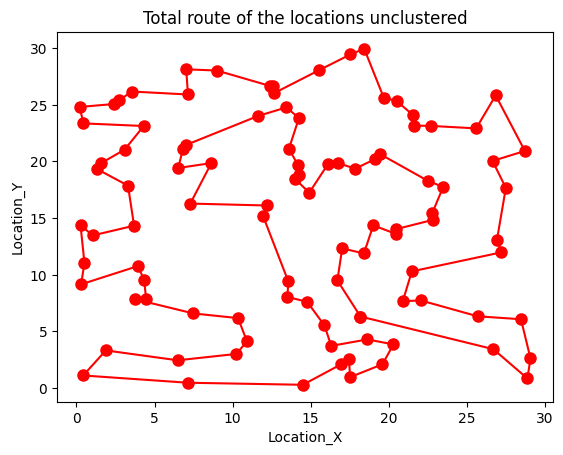

In [8]:
import matplotlib.pyplot as plt

coordinates = [(18.19, 6.32), (16.71, 9.5), (17.02, 12.33), (18.41, 11.88), (19.01, 14.36), (20.49, 13.59), (20.49, 14.03), (22.85, 14.85), (22.78, 15.42), (23.49, 17.75), (22.54, 18.26), (19.41, 20.67), (19.12, 20.2), (17.86, 19.36), (16.76, 19.84), (16.1, 19.74), (14.91, 17.24), (13.97, 18.49), (14.24, 18.8), (14.2, 19.64), (13.61, 21.12), (14.25, 23.83), (13.44, 24.76), (11.62, 24.0), (7.0, 21.44), (6.82, 21.1), (6.52, 19.42), (8.64, 19.85), (7.29, 16.28), (12.19, 16.11), (11.96, 15.15), (13.57, 9.41), (13.51, 8.05), (14.78, 7.61), (15.88, 5.54), (16.32, 3.73), (18.63, 4.3), (20.3, 3.86), (19.6, 2.11), (17.52, 0.97), (17.46, 2.56), (16.93, 2.09), (14.5, 0.3), (7.14, 0.48), (0.43, 1.12), (1.88, 3.33), (6.48, 2.46), (10.24, 3.02), (10.92, 4.13), (10.35, 6.18), (7.49, 6.59), (3.77, 7.84), (4.46, 7.85), (4.34, 9.51), (3.94, 10.77), (0.3, 9.16), (0.51, 11.06), (0.26, 14.37), (1.04, 13.47), (3.69, 14.33), (3.3, 17.86), (1.32, 19.32), (1.57, 19.84), (3.08, 21.03), (4.31, 23.12), (0.45, 23.35), (0.2, 24.8), (2.41, 25.06), (2.75, 25.4), (3.54, 26.16), (7.14, 25.9), (7.03, 28.12), (9.0, 28.01), (12.38, 26.66), (12.58, 26.64), (12.66, 26.02), (15.52, 28.03), (17.54, 29.43), (18.43, 29.93), (19.68, 25.62), (20.5, 25.33), (21.57, 24.07), (21.61, 23.16), (22.69, 23.13), (25.6, 22.91), (26.85, 25.82), (28.72, 20.92), (26.65, 20.04), (27.5, 17.66), (26.93, 13.06), (27.22, 11.98), (21.48, 10.3), (20.9, 7.67), (22.05, 7.74), (25.69, 6.34), (28.47, 6.08), (29.08, 2.62), (28.88, 0.86), (26.7, 3.44),(18.19, 6.32)]

x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

plt.plot(x, y, color='red', marker='o', linestyle='-', markersize=8)

# Add titles and heading
plt.xlabel('Location_X')
plt.ylabel('Location_Y')
plt.title('Total route of the locations unclustered')

plt.show()


In [9]:
df = create_data_model()
df

{'locations': [(18.19, 6.32),
  (15.52, 28.03),
  (9.0, 28.01),
  (16.93, 2.09),
  (8.64, 19.85),
  (18.43, 29.93),
  (3.94, 10.77),
  (14.78, 7.61),
  (2.41, 25.06),
  (18.41, 11.88),
  (14.91, 17.24),
  (7.14, 0.48),
  (13.44, 24.76),
  (17.54, 29.43),
  (16.71, 9.5),
  (12.38, 26.66),
  (25.69, 6.34),
  (11.62, 24.0),
  (10.24, 3.02),
  (3.54, 26.16),
  (17.86, 19.36),
  (3.77, 7.84),
  (14.2, 19.64),
  (15.88, 5.54),
  (1.32, 19.32),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (20.9, 7.67),
  (2.75, 25.4),
  (16.1, 19.74),
  (0.43, 1.12),
  (13.57, 9.41),
  (0.3, 9.16),
  (0.45, 23.35),
  (22.69, 23.13),
  (19.12, 20.2),
  (7.0, 21.44),
  (28.88, 0.86),
  (19.6, 2.11),
  (22.78, 15.42),
  (13.51, 8.05),
  (0.51, 11.06),
  (4.31, 23.12),
  (19.68, 25.62),
  (16.32, 3.73),
  (7.14, 25.9),
  (1.04, 13.47),
  (17.46, 2.56),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (28.47, 6.08),
  (6.52, 19.42),
  (26.85, 25.82),
  (21.48, 10

In [10]:
total_distance = solution.ObjectiveValue()
total_distance

189

In [11]:
df['locations'][0]

(18.19, 6.32)

In [12]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [30]:
df

{'locations': [(18.19, 6.32),
  (15.52, 28.03),
  (9.0, 28.01),
  (16.93, 2.09),
  (8.64, 19.85),
  (18.43, 29.93),
  (3.94, 10.77),
  (14.78, 7.61),
  (2.41, 25.06),
  (18.41, 11.88),
  (14.91, 17.24),
  (7.14, 0.48),
  (13.44, 24.76),
  (17.54, 29.43),
  (16.71, 9.5),
  (12.38, 26.66),
  (25.69, 6.34),
  (11.62, 24.0),
  (10.24, 3.02),
  (3.54, 26.16),
  (17.86, 19.36),
  (3.77, 7.84),
  (14.2, 19.64),
  (15.88, 5.54),
  (1.32, 19.32),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (20.9, 7.67),
  (2.75, 25.4),
  (16.1, 19.74),
  (0.43, 1.12),
  (13.57, 9.41),
  (0.3, 9.16),
  (0.45, 23.35),
  (22.69, 23.13),
  (19.12, 20.2),
  (7.0, 21.44),
  (28.88, 0.86),
  (19.6, 2.11),
  (22.78, 15.42),
  (13.51, 8.05),
  (0.51, 11.06),
  (4.31, 23.12),
  (19.68, 25.62),
  (16.32, 3.73),
  (7.14, 25.9),
  (1.04, 13.47),
  (17.46, 2.56),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (28.47, 6.08),
  (6.52, 19.42),
  (26.85, 25.82),
  (21.48, 10

In [13]:
total_distance = solution.ObjectiveValue()
accumulator = 0
charge_points = []

for i in range(len(final)-1):
  dis = euclidean_distance(df['locations'][final[i]], df['locations'][final[i+1]])
  accumulator += dis

  # print(accumulator)

  if(accumulator >= 40):
    charge_points.append(final[i])
    accumulator = 0
no_chrg=len(charge_points)
if(total_distance<no_chrg*40):
    charge_points_new=charge_points[:-1]
else:
    charge_points_new=charge_points 
charge_points_new
#charge_points_new
#charge_points.pop()

[70, 45, 51, 65]

In [32]:
charge_points_new

[70, 45, 51, 65]

In [33]:
for point in charge_points_new:
  print(df['locations'][point])

(1.88, 3.33)
(4.31, 23.12)
(23.49, 17.75)
(7.03, 28.12)


In [34]:
charge_point_locations= {}
i = 0
for  point in charge_points_new:
  charge_point_locations[i] = df['locations'][point]
  i+=1

charge_point_locations

{0: (1.88, 3.33), 1: (4.31, 23.12), 2: (23.49, 17.75), 3: (7.03, 28.12)}

In [35]:
solution.ObjectiveValue()


189

In [36]:
no_chrg=len(charge_points_new)
import math
#various defined input values
average_speed =30
range=40 #distance covered on full charged device
charging_time=0.5

# Retrieve the solution and calculate the total distance
total_distance = solution.ObjectiveValue()
total_timewhtcr=total_distance/average_speed
total_time=total_timewhtcr+charging_time*no_chrg
print("Total distance:", total_distance,"km")
print("Total time without charging:", total_timewhtcr,"hrs")
print("Total time with charging:", total_time,"hrs")


Total distance: 189 km
Total time without charging: 6.3 hrs
Total time with charging: 8.3 hrs


Implement k means clustering  for splitting the location into 2 clusters then using google OR to identify the charging points of each cluster as well as the maximum distance covered by each

In [14]:
from sklearn.cluster import KMeans

# Assuming you have a list of locations as coordinates
locations = [(18.19, 6.32),
  (15.52, 28.03),
  (9.0, 28.01),
  (16.93, 2.09),
  (8.64, 19.85),
  (18.43, 29.93),
  (3.94, 10.77),
  (14.78, 7.61),
  (2.41, 25.06),
  (18.41, 11.88),
  (14.91, 17.24),
  (7.14, 0.48),
  (13.44, 24.76),
  (17.54, 29.43),
  (16.71, 9.5),
  (12.38, 26.66),
  (25.69, 6.34),
  (11.62, 24.0),
  (10.24, 3.02),
  (3.54, 26.16),
  (17.86, 19.36),
  (3.77, 7.84),
  (14.2, 19.64),
  (15.88, 5.54),
  (1.32, 19.32),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (20.9, 7.67),
  (2.75, 25.4),
  (16.1, 19.74),
  (0.43, 1.12),
  (13.57, 9.41),
  (0.3, 9.16),
  (0.45, 23.35),
  (22.69, 23.13),
  (19.12, 20.2),
  (7.0, 21.44),
  (28.88, 0.86),
  (19.6, 2.11),
  (22.78, 15.42),
  (13.51, 8.05),
  (0.51, 11.06),
  (4.31, 23.12),
  (19.68, 25.62),
  (16.32, 3.73),
  (7.14, 25.9),
  (1.04, 13.47),
  (17.46, 2.56),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (28.47, 6.08),
  (6.52, 19.42),
  (26.85, 25.82),
  (21.48, 10.3),
  (29.08, 2.62),
  (22.54, 18.26),
  (4.46, 7.85),
  (21.61, 23.16),
  (6.82, 21.1),
  (6.48, 2.46),
  (26.7, 3.44),
  (7.03, 28.12),
  (20.3, 3.86),
  (17.02, 12.33),
  (0.2, 24.8),
  (13.97, 18.49),
  (1.88, 3.33),
  (14.25, 23.83),
  (27.22, 11.98),
  (22.05, 7.74),
  (3.08, 21.03),
  (12.66, 26.02),
  (3.69, 14.33),
  (26.93, 13.06),
  (1.57, 19.84),
  (19.01, 14.36),
  (14.24, 18.8),
  (20.49, 13.59),
  (3.3, 17.86),
  (28.72, 20.92),
  (7.49, 6.59),
  (12.19, 16.11),
  (17.52, 0.97),
  (10.35, 6.18),
  (13.61, 21.12),
  (0.26, 14.37),
  (12.58, 26.64),
  (21.57, 24.07),
  (14.5, 0.3),
  (25.6, 22.91),
  (10.92, 4.13),
  (26.65, 20.04),
  (18.63, 4.3),
  (7.29, 16.28),
  (4.34, 9.51)]

# Define the number of clusters
k = 3

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(locations)

# Get the cluster labels for each location
cluster_labels = kmeans.labels_

# Create a dictionary to store the locations for each cluster
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(locations[i])

# Print the locations of each cluster
for label, cluster in clusters.items():
    print(f"Cluster {label}:")
    for location in cluster:
        print(location)
    print()

Cluster 0:
(18.19, 6.32)
(16.93, 2.09)
(14.78, 7.61)
(18.41, 11.88)
(7.14, 0.48)
(16.71, 9.5)
(25.69, 6.34)
(10.24, 3.02)
(15.88, 5.54)
(20.9, 7.67)
(13.57, 9.41)
(28.88, 0.86)
(19.6, 2.11)
(13.51, 8.05)
(16.32, 3.73)
(17.46, 2.56)
(28.47, 6.08)
(21.48, 10.3)
(29.08, 2.62)
(6.48, 2.46)
(26.7, 3.44)
(20.3, 3.86)
(17.02, 12.33)
(27.22, 11.98)
(22.05, 7.74)
(26.93, 13.06)
(20.49, 13.59)
(17.52, 0.97)
(10.35, 6.18)
(14.5, 0.3)
(10.92, 4.13)
(18.63, 4.3)

Cluster 2:
(15.52, 28.03)
(9.0, 28.01)
(18.43, 29.93)
(14.91, 17.24)
(13.44, 24.76)
(17.54, 29.43)
(12.38, 26.66)
(11.62, 24.0)
(17.86, 19.36)
(14.2, 19.64)
(20.5, 25.33)
(16.76, 19.84)
(27.5, 17.66)
(19.41, 20.67)
(20.49, 14.03)
(16.1, 19.74)
(22.69, 23.13)
(19.12, 20.2)
(22.78, 15.42)
(19.68, 25.62)
(23.49, 17.75)
(22.85, 14.85)
(26.85, 25.82)
(22.54, 18.26)
(21.61, 23.16)
(13.97, 18.49)
(14.25, 23.83)
(12.66, 26.02)
(19.01, 14.36)
(14.24, 18.8)
(28.72, 20.92)
(13.61, 21.12)
(12.58, 26.64)
(21.57, 24.07)
(25.6, 22.91)
(26.65, 20.04)

Clu

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


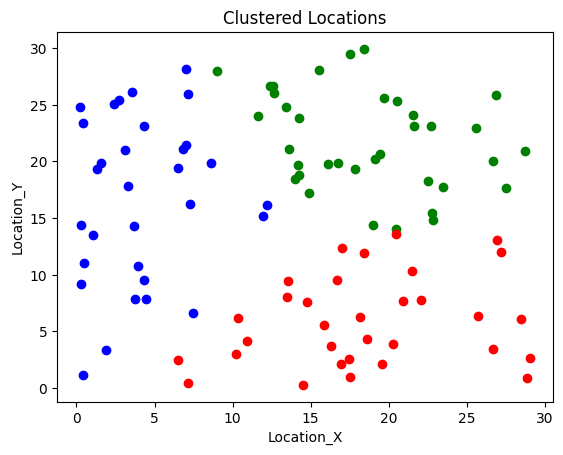

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a list of locations as coordinates
locations = [(18.19, 6.32),
  (15.52, 28.03),
  (9.0, 28.01),
  (16.93, 2.09),
  (8.64, 19.85),
  (18.43, 29.93),
  (3.94, 10.77),
  (14.78, 7.61),
  (2.41, 25.06),
  (18.41, 11.88),
  (14.91, 17.24),
  (7.14, 0.48),
  (13.44, 24.76),
  (17.54, 29.43),
  (16.71, 9.5),
  (12.38, 26.66),
  (25.69, 6.34),
  (11.62, 24.0),
  (10.24, 3.02),
  (3.54, 26.16),
  (17.86, 19.36),
  (3.77, 7.84),
  (14.2, 19.64),
  (15.88, 5.54),
  (1.32, 19.32),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (20.9, 7.67),
  (2.75, 25.4),
  (16.1, 19.74),
  (0.43, 1.12),
  (13.57, 9.41),
  (0.3, 9.16),
  (0.45, 23.35),
  (22.69, 23.13),
  (19.12, 20.2),
  (7.0, 21.44),
  (28.88, 0.86),
  (19.6, 2.11),
  (22.78, 15.42),
  (13.51, 8.05),
  (0.51, 11.06),
  (4.31, 23.12),
  (19.68, 25.62),
  (16.32, 3.73),
  (7.14, 25.9),
  (1.04, 13.47),
  (17.46, 2.56),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (28.47, 6.08),
  (6.52, 19.42),
  (26.85, 25.82),
  (21.48, 10.3),
  (29.08, 2.62),
  (22.54, 18.26),
  (4.46, 7.85),
  (21.61, 23.16),
  (6.82, 21.1),
  (6.48, 2.46),
  (26.7, 3.44),
  (7.03, 28.12),
  (20.3, 3.86),
  (17.02, 12.33),
  (0.2, 24.8),
  (13.97, 18.49),
  (1.88, 3.33),
  (14.25, 23.83),
  (27.22, 11.98),
  (22.05, 7.74),
  (3.08, 21.03),
  (12.66, 26.02),
  (3.69, 14.33),
  (26.93, 13.06),
  (1.57, 19.84),
  (19.01, 14.36),
  (14.24, 18.8),
  (20.49, 13.59),
  (3.3, 17.86),
  (28.72, 20.92),
  (7.49, 6.59),
  (12.19, 16.11),
  (17.52, 0.97),
  (10.35, 6.18),
  (13.61, 21.12),
  (0.26, 14.37),
  (12.58, 26.64),
  (21.57, 24.07),
  (14.5, 0.3),
  (25.6, 22.91),
  (10.92, 4.13),
  (26.65, 20.04),
  (18.63, 4.3),
  (7.29, 16.28),
  (4.34, 9.51)]

# Define the number of clusters
k = 3

# Create a KMeans object and fit the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(locations)

# Get the cluster labels for each location
cluster_labels = kmeans.labels_

# Create a list of colors for each cluster
colors = ['red', 'blue', 'green','orange']
#colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot the locations with different colors based on the clusters
for i, location in enumerate(locations):
    x, y = location
    label = cluster_labels[i]
    color = colors[label]
    plt.scatter(x, y, color=color)

# Set plot title and labels
plt.title("Clustered Locations")
plt.xlabel("Location_X")
plt.ylabel("Location_Y")

# Show the plot
plt.show()

Identify the routes of the clustered items, cluster 2nd (red)

In [1]:
!pip install ortools

In [2]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [3]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in cluster 1
    data["locations"] = [(18.19, 6.32),
(16.93, 2.09),
(14.78, 7.61),
(18.41, 11.88),
(16.71, 9.5),
(25.69, 6.34),
(15.88, 5.54),
(20.9, 7.67),
(13.57, 9.41),
(28.88, 0.86),
(19.6, 2.11),
(13.51, 8.05),
(16.32, 3.73),
(17.46, 2.56),
(28.47, 6.08),
(21.48, 10.3),
(29.08, 2.62),
(26.7, 3.44),
(20.3, 3.86),
(17.02, 12.33),
(27.22, 11.98),
(22.05, 7.74),
(26.93, 13.06),
(17.52, 0.97),
(14.5, 0.3),
(18.63, 4.3)]
        # fmt: on
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(index)
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Objective: {route_distance}m\n"

    return route

In [4]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    final = print_solution(manager, routing, solution)



Objective: 57
Route:
 0 -> 7 -> 21 -> 5 -> 17 -> 9 -> 16 -> 14 -> 20 -> 22 -> 15 -> 3 -> 19 -> 4 -> 8 -> 11 -> 2 -> 6 -> 12 -> 24 -> 1 -> 13 -> 23 -> 10 -> 18 -> 25 -> 0



In [5]:
  # Solve the problem
    #solution = routing.SolveWithParameters(search_parameters)

# Extract the route
route = []
index = routing.Start(0)  # Start at the depot
while not routing.IsEnd(index):
    node = manager.IndexToNode(index)
    route.append(data['locations'][node])
    index = solution.Value(routing.NextVar(index))

# route now contains the list of coordinates in the optimized route
print(route)

[(18.19, 6.32), (20.9, 7.67), (22.05, 7.74), (25.69, 6.34), (26.7, 3.44), (28.88, 0.86), (29.08, 2.62), (28.47, 6.08), (27.22, 11.98), (26.93, 13.06), (21.48, 10.3), (18.41, 11.88), (17.02, 12.33), (16.71, 9.5), (13.57, 9.41), (13.51, 8.05), (14.78, 7.61), (15.88, 5.54), (16.32, 3.73), (14.5, 0.3), (16.93, 2.09), (17.46, 2.56), (17.52, 0.97), (19.6, 2.11), (20.3, 3.86), (18.63, 4.3)]


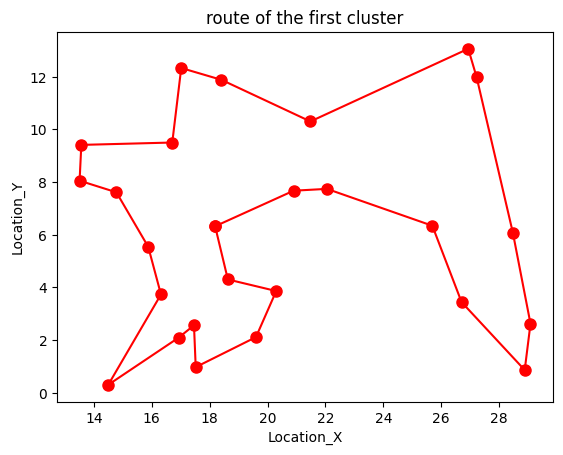

In [6]:
import matplotlib.pyplot as plt

coordinates = [(18.19, 6.32), (20.9, 7.67), (22.05, 7.74), (25.69, 6.34), (26.7, 3.44), (28.88, 0.86), (29.08, 2.62), (28.47, 6.08), (27.22, 11.98), (26.93, 13.06), (21.48, 10.3), (18.41, 11.88), (17.02, 12.33), (16.71, 9.5), (13.57, 9.41), (13.51, 8.05), (14.78, 7.61), (15.88, 5.54), (16.32, 3.73), (14.5, 0.3), (16.93, 2.09), (17.46, 2.56), (17.52, 0.97), (19.6, 2.11), (20.3, 3.86), (18.63, 4.3),(18.19, 6.32)]
x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

plt.plot(x, y, color='red', marker='o', linestyle='-', markersize=8)

# Add titles and heading
plt.xlabel('Location_X')
plt.ylabel('Location_Y')
plt.title('route of the first cluster')

plt.show()

In [7]:
df = create_data_model()
df

{'locations': [(18.19, 6.32),
  (16.93, 2.09),
  (14.78, 7.61),
  (18.41, 11.88),
  (16.71, 9.5),
  (25.69, 6.34),
  (15.88, 5.54),
  (20.9, 7.67),
  (13.57, 9.41),
  (28.88, 0.86),
  (19.6, 2.11),
  (13.51, 8.05),
  (16.32, 3.73),
  (17.46, 2.56),
  (28.47, 6.08),
  (21.48, 10.3),
  (29.08, 2.62),
  (26.7, 3.44),
  (20.3, 3.86),
  (17.02, 12.33),
  (27.22, 11.98),
  (22.05, 7.74),
  (26.93, 13.06),
  (17.52, 0.97),
  (14.5, 0.3),
  (18.63, 4.3)],
 'num_vehicles': 1,
 'depot': 0}

In [8]:
df['locations'][0]

(18.19, 6.32)

In [9]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [10]:
df

{'locations': [(18.19, 6.32),
  (16.93, 2.09),
  (14.78, 7.61),
  (18.41, 11.88),
  (16.71, 9.5),
  (25.69, 6.34),
  (15.88, 5.54),
  (20.9, 7.67),
  (13.57, 9.41),
  (28.88, 0.86),
  (19.6, 2.11),
  (13.51, 8.05),
  (16.32, 3.73),
  (17.46, 2.56),
  (28.47, 6.08),
  (21.48, 10.3),
  (29.08, 2.62),
  (26.7, 3.44),
  (20.3, 3.86),
  (17.02, 12.33),
  (27.22, 11.98),
  (22.05, 7.74),
  (26.93, 13.06),
  (17.52, 0.97),
  (14.5, 0.3),
  (18.63, 4.3)],
 'num_vehicles': 1,
 'depot': 0}

In [11]:
total_distance = solution.ObjectiveValue()
accumulator = 0
charge_points = []

for i in range(len(final)-1):
  dis = euclidean_distance(df['locations'][final[i]], df['locations'][final[i+1]])
  accumulator += dis

  # print(accumulator)

  if(accumulator >= 40):
    charge_points.append(final[i])
    accumulator = 0
no_chrg=len(charge_points)
if(total_distance<=no_chrg*40):
    charge_points_new=charge_points[:-1]
else:
    charge_points_new=charge_points
charge_points_new

[19]

In [12]:
for point in charge_points_new:
  print(df['locations'][point])

(17.02, 12.33)


In [13]:
charge_point_locations= {}
i = 0
for  point in charge_points_new:
  charge_point_locations[i] = df['locations'][point]
  i+=1

charge_point_locations

{0: (17.02, 12.33)}

In [14]:
solution.ObjectiveValue()


57

In [15]:
charging_loc=charge_point_locations.values()
no_chrg=len(charge_points_new)
import math
#various defined input values
average_speed =30
range=40 #distance covered on full charged device
charging_time=0.25

# Retrieve the solution and calculate the total distance
total_distance = solution.ObjectiveValue()
total_timewhtcr=total_distance/average_speed
total_time=total_timewhtcr+charging_time*no_chrg
print("Total distance:", total_distance,"km")
print("Total time without charging:", total_timewhtcr,"hrs")
print("Total time with charging:", total_time,"hrs")
print("Number of  charging point:", len(charge_points_new),"point")
print("charging point location", charging_loc,"coordinates")

Total distance: 57 km
Total time without charging: 1.9 hrs
Total time with charging: 2.15 hrs
Number of  charging point: 1 point
charging point location dict_values([(17.02, 12.33)]) coordinates


In [16]:
# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)
print_solution(manager, routing, solution)

z=print_solution(manager, routing, solution)

final

Objective: 57
Route:
 0 -> 7 -> 21 -> 5 -> 17 -> 9 -> 16 -> 14 -> 20 -> 22 -> 15 -> 3 -> 19 -> 4 -> 8 -> 11 -> 2 -> 6 -> 12 -> 24 -> 1 -> 13 -> 23 -> 10 -> 18 -> 25 -> 0

Objective: 57
Route:
 0 -> 7 -> 21 -> 5 -> 17 -> 9 -> 16 -> 14 -> 20 -> 22 -> 15 -> 3 -> 19 -> 4 -> 8 -> 11 -> 2 -> 6 -> 12 -> 24 -> 1 -> 13 -> 23 -> 10 -> 18 -> 25 -> 0



[0,
 7,
 21,
 5,
 17,
 9,
 16,
 14,
 20,
 22,
 15,
 3,
 19,
 4,
 8,
 11,
 2,
 6,
 12,
 24,
 1,
 13,
 23,
 10,
 18,
 25]

In [17]:
final

[0,
 7,
 21,
 5,
 17,
 9,
 16,
 14,
 20,
 22,
 15,
 3,
 19,
 4,
 8,
 11,
 2,
 6,
 12,
 24,
 1,
 13,
 23,
 10,
 18,
 25]

Implement for the second cluster(blue)

In [1]:
!pip install ortools

In [2]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [3]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in cluster 1
    data["locations"] = [(18.19, 6.32), #deport location
(15.52, 28.03),
(18.43, 29.93),
(14.91, 17.24),
(17.54, 29.43),
(17.86, 19.36),
(14.2, 19.64),
(20.5, 25.33),
(16.76, 19.84),
(27.5, 17.66),
(19.41, 20.67),
(20.49, 14.03),
(16.1, 19.74),
(22.69, 23.13),
(19.12, 20.2),
(22.78, 15.42),
(19.68, 25.62),
(23.49, 17.75),
(11.96, 15.15),
(22.85, 14.85),
(26.85, 25.82),
(22.54, 18.26),
(21.61, 23.16),
(13.97, 18.49),
(14.25, 23.83),
(19.01, 14.36),
(14.24, 18.8),
(20.49, 13.59),
(28.72, 20.92),
(12.19, 16.11),
(13.61, 21.12),
(21.57, 24.07),
(25.6, 22.91),
(26.65, 20.04)]
        # fmt: on
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(index)
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Objective: {route_distance}m\n"

    return route

In [4]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    final = print_solution(manager, routing, solution)



Objective: 76
Route:
 0 -> 27 -> 11 -> 9 -> 33 -> 28 -> 32 -> 20 -> 2 -> 4 -> 1 -> 24 -> 30 -> 6 -> 26 -> 23 -> 18 -> 29 -> 3 -> 12 -> 8 -> 5 -> 14 -> 10 -> 16 -> 7 -> 31 -> 22 -> 13 -> 21 -> 17 -> 15 -> 19 -> 25 -> 0



In [5]:
  # Solve the problem
    #solution = routing.SolveWithParameters(search_parameters)

    # Extract the route
route = []
index = routing.Start(0)  # Start at the depot
while not routing.IsEnd(index):
    node = manager.IndexToNode(index)
    route.append(data['locations'][node])
    index = solution.Value(routing.NextVar(index))

# route now contains the list of coordinates in the optimized route
print(route)

[(18.19, 6.32), (20.49, 13.59), (20.49, 14.03), (27.5, 17.66), (26.65, 20.04), (28.72, 20.92), (25.6, 22.91), (26.85, 25.82), (18.43, 29.93), (17.54, 29.43), (15.52, 28.03), (14.25, 23.83), (13.61, 21.12), (14.2, 19.64), (14.24, 18.8), (13.97, 18.49), (11.96, 15.15), (12.19, 16.11), (14.91, 17.24), (16.1, 19.74), (16.76, 19.84), (17.86, 19.36), (19.12, 20.2), (19.41, 20.67), (19.68, 25.62), (20.5, 25.33), (21.57, 24.07), (21.61, 23.16), (22.69, 23.13), (22.54, 18.26), (23.49, 17.75), (22.78, 15.42), (22.85, 14.85), (19.01, 14.36)]


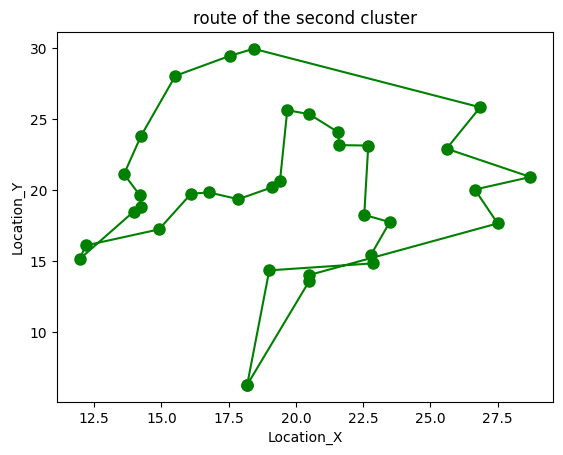

In [6]:
import matplotlib.pyplot as plt

coordinates = [(18.19, 6.32), (20.49, 13.59), (20.49, 14.03), (27.5, 17.66), (26.65, 20.04), (28.72, 20.92), (25.6, 22.91), (26.85, 25.82), (18.43, 29.93), (17.54, 29.43), (15.52, 28.03), (14.25, 23.83), (13.61, 21.12), (14.2, 19.64), (14.24, 18.8), (13.97, 18.49), (11.96, 15.15), (12.19, 16.11), (14.91, 17.24), (16.1, 19.74), (16.76, 19.84), (17.86, 19.36), (19.12, 20.2), (19.41, 20.67), (19.68, 25.62), (20.5, 25.33), (21.57, 24.07), (21.61, 23.16), (22.69, 23.13), (22.54, 18.26), (23.49, 17.75), (22.78, 15.42), (22.85, 14.85), (19.01, 14.36),(18.19, 6.32)]
sorted_coordinates = sorted(coordinates, key=lambda coord: coord[0])

x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

plt.plot(x, y, color='green', marker='o', linestyle='-', markersize=8)

# Add titles and heading
plt.xlabel('Location_X')
plt.ylabel('Location_Y')
plt.title('route of the second cluster')

plt.show()

In [7]:
df = create_data_model()
df

{'locations': [(18.19, 6.32),
  (15.52, 28.03),
  (18.43, 29.93),
  (14.91, 17.24),
  (17.54, 29.43),
  (17.86, 19.36),
  (14.2, 19.64),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (16.1, 19.74),
  (22.69, 23.13),
  (19.12, 20.2),
  (22.78, 15.42),
  (19.68, 25.62),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (26.85, 25.82),
  (22.54, 18.26),
  (21.61, 23.16),
  (13.97, 18.49),
  (14.25, 23.83),
  (19.01, 14.36),
  (14.24, 18.8),
  (20.49, 13.59),
  (28.72, 20.92),
  (12.19, 16.11),
  (13.61, 21.12),
  (21.57, 24.07),
  (25.6, 22.91),
  (26.65, 20.04)],
 'num_vehicles': 1,
 'depot': 0}

In [8]:
df['locations'][0]

(18.19, 6.32)

In [9]:
df

{'locations': [(18.19, 6.32),
  (15.52, 28.03),
  (18.43, 29.93),
  (14.91, 17.24),
  (17.54, 29.43),
  (17.86, 19.36),
  (14.2, 19.64),
  (20.5, 25.33),
  (16.76, 19.84),
  (27.5, 17.66),
  (19.41, 20.67),
  (20.49, 14.03),
  (16.1, 19.74),
  (22.69, 23.13),
  (19.12, 20.2),
  (22.78, 15.42),
  (19.68, 25.62),
  (23.49, 17.75),
  (11.96, 15.15),
  (22.85, 14.85),
  (26.85, 25.82),
  (22.54, 18.26),
  (21.61, 23.16),
  (13.97, 18.49),
  (14.25, 23.83),
  (19.01, 14.36),
  (14.24, 18.8),
  (20.49, 13.59),
  (28.72, 20.92),
  (12.19, 16.11),
  (13.61, 21.12),
  (21.57, 24.07),
  (25.6, 22.91),
  (26.65, 20.04)],
 'num_vehicles': 1,
 'depot': 0}

In [10]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [11]:
total_distance = solution.ObjectiveValue()
accumulator = 0
charge_points = []

for i in range(len(final)-1):
  dis = euclidean_distance(df['locations'][final[i]], df['locations'][final[i+1]])
  accumulator += dis

  # print(accumulator)

  if(accumulator >= 40):
    charge_points.append(final[i])
    accumulator = 0
no_chrg=len(charge_points)
if(total_distance<=no_chrg*40):
    charge_points_new=charge_points[:-1]
else:
    charge_points_new=charge_points
charge_points_new

[4]

In [12]:
for point in charge_points_new:
  print(df['locations'][point])

(17.54, 29.43)


In [13]:
charge_point_locations= {}
i = 0
for  point in charge_points_new:
  charge_point_locations[i] = df['locations'][point]
  i+=1

charge_point_locations

{0: (17.54, 29.43)}

In [14]:
final

[0,
 27,
 11,
 9,
 33,
 28,
 32,
 20,
 2,
 4,
 1,
 24,
 30,
 6,
 26,
 23,
 18,
 29,
 3,
 12,
 8,
 5,
 14,
 10,
 16,
 7,
 31,
 22,
 13,
 21,
 17,
 15,
 19,
 25]

In [15]:
solution.ObjectiveValue()


76

In [16]:
no_chrg2=len(charge_points_new)
import math
#various defined input values
average_speed =30
range=40 #distance covered on full charged device
charging_time=0.25

# Retrieve the solution and calculate the total distance
total_distance = solution.ObjectiveValue()
total_timewhtcr=total_distance/average_speed
total_time=total_timewhtcr+charging_time*no_chrg2
print("Total distance:", total_distance,"km")
print("Total time without charging:", total_timewhtcr,"hrs")
print("Total time with charging:", total_time,"hrs")
print("number of charging stations",len(charge_points_new))
print("location of charging stations",charge_point_locations.values())

Total distance: 76 km
Total time without charging: 2.533333333333333 hrs
Total time with charging: 2.783333333333333 hrs
number of charging stations 1
location of charging stations dict_values([(17.54, 29.43)])


## Identifying the route of the third cluster

In [1]:
!pip install ortools

In [2]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [3]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in cluster 1
    data["locations"] = [(18.19, 6.32), #deport location
(9.0, 28.01),
(8.64, 19.85),
(2.41, 25.06),
(13.44, 24.76),
(12.38, 26.66),
(11.62, 24.0),
(3.54, 26.16),
(1.32, 19.32),
(2.75, 25.4),
(0.45, 23.35),
(7.0, 21.44),
(4.31, 23.12),
(7.14, 25.9),
(6.52, 19.42),
(6.82, 21.1),
(7.03, 28.12),
(0.2, 24.8),
(3.08, 21.03),
(12.66, 26.02),
(1.57, 19.84),
(3.3, 17.86),
(12.58, 26.64),
(7.29, 16.28)]
        # fmt: on
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(index)
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Objective: {route_distance}m\n"

    return route

In [4]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    final = print_solution(manager, routing, solution)



Objective: 65
Route:
 0 -> 23 -> 2 -> 11 -> 15 -> 14 -> 21 -> 8 -> 20 -> 18 -> 10 -> 17 -> 7 -> 3 -> 9 -> 12 -> 13 -> 16 -> 1 -> 22 -> 5 -> 19 -> 4 -> 6 -> 0



In [5]:
# Solve the problem
#solution = routing.SolveWithParameters(search_parameters)

# Extract the route
route = []
index = routing.Start(0)  # Start at the depot
while not routing.IsEnd(index):
    node = manager.IndexToNode(index)
    route.append(data['locations'][node])
    index = solution.Value(routing.NextVar(index))

# route now contains the list of coordinates in the optimized route
print(route)

[(18.19, 6.32), (7.29, 16.28), (8.64, 19.85), (7.0, 21.44), (6.82, 21.1), (6.52, 19.42), (3.3, 17.86), (1.32, 19.32), (1.57, 19.84), (3.08, 21.03), (0.45, 23.35), (0.2, 24.8), (3.54, 26.16), (2.41, 25.06), (2.75, 25.4), (4.31, 23.12), (7.14, 25.9), (7.03, 28.12), (9.0, 28.01), (12.58, 26.64), (12.38, 26.66), (12.66, 26.02), (13.44, 24.76), (11.62, 24.0)]


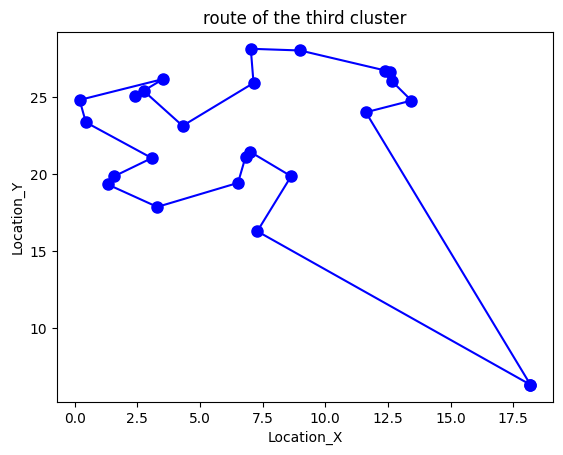

In [6]:
import matplotlib.pyplot as plt

coordinates = [(18.19, 6.32), 
               (7.29, 16.28), 
               (8.64, 19.85), 
               (7.0, 21.44), 
               (6.82, 21.1), 
               (6.52, 19.42), 
               (3.3, 17.86), 
               (1.32, 19.32), 
               (1.57, 19.84), 
               (3.08, 21.03), 
               (0.45, 23.35), 
               (0.2, 24.8), 
               (3.54, 26.16), 
               (2.41, 25.06), 
               (2.75, 25.4), 
               (4.31, 23.12),
               (7.14, 25.9), 
               (7.03, 28.12), 
               (9.0, 28.01), 
               (12.58, 26.64), 
               (12.38, 26.66), 
               (12.66, 26.02), 
               (13.44, 24.76), 
               (11.62, 24.0),
              (18.19, 6.32)]
sorted_coordinates = sorted(coordinates, key=lambda coord: coord[0])

x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

plt.plot(x, y, color='blue', marker='o', linestyle='-', markersize=8)

# Add titles and heading
plt.xlabel('Location_X')
plt.ylabel('Location_Y')
plt.title('route of the third cluster')

plt.show()

In [7]:
final

[0,
 23,
 2,
 11,
 15,
 14,
 21,
 8,
 20,
 18,
 10,
 17,
 7,
 3,
 9,
 12,
 13,
 16,
 1,
 22,
 5,
 19,
 4,
 6]

In [8]:
df = create_data_model()
df

{'locations': [(18.19, 6.32),
  (9.0, 28.01),
  (8.64, 19.85),
  (2.41, 25.06),
  (13.44, 24.76),
  (12.38, 26.66),
  (11.62, 24.0),
  (3.54, 26.16),
  (1.32, 19.32),
  (2.75, 25.4),
  (0.45, 23.35),
  (7.0, 21.44),
  (4.31, 23.12),
  (7.14, 25.9),
  (6.52, 19.42),
  (6.82, 21.1),
  (7.03, 28.12),
  (0.2, 24.8),
  (3.08, 21.03),
  (12.66, 26.02),
  (1.57, 19.84),
  (3.3, 17.86),
  (12.58, 26.64),
  (7.29, 16.28)],
 'num_vehicles': 1,
 'depot': 0}

In [9]:
df['locations'][0]

(18.19, 6.32)

In [10]:
df

{'locations': [(18.19, 6.32),
  (9.0, 28.01),
  (8.64, 19.85),
  (2.41, 25.06),
  (13.44, 24.76),
  (12.38, 26.66),
  (11.62, 24.0),
  (3.54, 26.16),
  (1.32, 19.32),
  (2.75, 25.4),
  (0.45, 23.35),
  (7.0, 21.44),
  (4.31, 23.12),
  (7.14, 25.9),
  (6.52, 19.42),
  (6.82, 21.1),
  (7.03, 28.12),
  (0.2, 24.8),
  (3.08, 21.03),
  (12.66, 26.02),
  (1.57, 19.84),
  (3.3, 17.86),
  (12.58, 26.64),
  (7.29, 16.28)],
 'num_vehicles': 1,
 'depot': 0}

In [11]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [12]:
total_distance = solution.ObjectiveValue()
accumulator = 0
charge_points = []

for i in range(len(final)-1):
  dis = euclidean_distance(df['locations'][final[i]], df['locations'][final[i+1]])
  accumulator += dis

  # print(accumulator)

  if(accumulator >= 40):
    charge_points.append(final[i])
    accumulator = 0
no_chrg=len(charge_points)
if(total_distance<=no_chrg*40):
    charge_points_new=charge_points[:-1]
else:
    charge_points_new=charge_points
charge_points_new

[17]

In [13]:
charge_points_new

[17]

In [14]:
for point in charge_points_new:
  print(df['locations'][point])

(0.2, 24.8)


In [15]:
charge_point_locations= {}
i = 0
for  point in charge_points_new:
  charge_point_locations[i] = df['locations'][point]
  i+=1

charge_point_locations

{0: (0.2, 24.8)}

In [16]:
solution.ObjectiveValue()


65

In [17]:
no_chrg2=len(charge_points_new)
import math
#various defined input values
average_speed =30
range=40 #distance covered on full charged device
charging_time=0.25

# Retrieve the solution and calculate the total distance
total_distance = solution.ObjectiveValue()
total_timewhtcr=total_distance/average_speed
total_time=total_timewhtcr+charging_time*no_chrg2
print("Total distance:", total_distance,"km")
print("Total time without charging:", total_timewhtcr,"hrs")
print("Total time with charging:", total_time,"hrs")
print("number of charging stations",len(charge_points_new))
print("charging stations location",charge_point_locations.values())

Total distance: 65 km
Total time without charging: 2.1666666666666665 hrs
Total time with charging: 2.4166666666666665 hrs
number of charging stations 1
charging stations location dict_values([(0.2, 24.8)])


Identify the route for the fourth cluster orange


In [18]:
!pip install ortools

In [19]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [20]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Locations in cluster 4
    data["locations"] = [(18.19, 6.32), #deport location
(3.94, 10.77),
(7.14, 0.48),
(10.24, 3.02),
(3.77, 7.84),
(0.43, 1.12),
(0.3, 9.16),
(0.51, 11.06),
(1.04, 13.47),
(4.46, 7.85),
(6.48, 2.46),
(1.88, 3.33),
(3.69, 14.33),
(7.49, 6.59),
(10.35, 6.18),
(0.26, 14.37),
(10.92, 4.13),
(4.34, 9.51)]
        # fmt: on
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data

def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = int(
                    math.hypot((from_node[0] - to_node[0]), (from_node[1] - to_node[1]))
                )
    return distances


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    index = routing.Start(0)
    plan_output = "Route:\n"
    route_distance = 0
    route = []
    while not routing.IsEnd(index):
        route.append(index)
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Objective: {route_distance}m\n"

    return route

In [21]:
# Instantiate the data problem.
data = create_data_model()

# Create the routing index manager.
manager = pywrapcp.RoutingIndexManager(
    len(data["locations"]), data["num_vehicles"], data["depot"]
)

# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

distance_matrix = compute_euclidean_distance_matrix(data["locations"])

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return distance_matrix[from_node][to_node]
transit_callback_index = routing.RegisterTransitCallback(distance_callback)

# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
     routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
)

# Solve the problem.
solution = routing.SolveWithParameters(search_parameters)

# Print solution on console.
if solution:
    final = print_solution(manager, routing, solution)


Objective: 51
Route:
 0 -> 16 -> 3 -> 10 -> 2 -> 5 -> 11 -> 6 -> 7 -> 15 -> 8 -> 12 -> 1 -> 17 -> 4 -> 9 -> 13 -> 14 -> 0



In [22]:
# Solve the problem
#solution = routing.SolveWithParameters(search_parameters)

# Extract the route
route = []
index = routing.Start(0)  # Start at the depot
while not routing.IsEnd(index):
    node = manager.IndexToNode(index)
    route.append(data['locations'][node])
    index = solution.Value(routing.NextVar(index))

# route now contains the list of coordinates in the optimized route
print(route)

[(18.19, 6.32), (10.92, 4.13), (10.24, 3.02), (6.48, 2.46), (7.14, 0.48), (0.43, 1.12), (1.88, 3.33), (0.3, 9.16), (0.51, 11.06), (0.26, 14.37), (1.04, 13.47), (3.69, 14.33), (3.94, 10.77), (4.34, 9.51), (3.77, 7.84), (4.46, 7.85), (7.49, 6.59), (10.35, 6.18)]


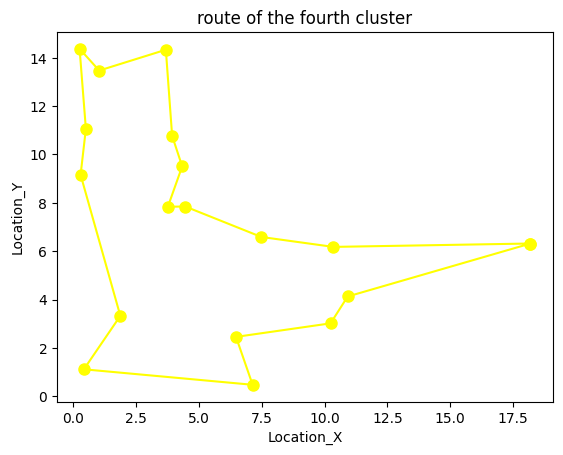

In [23]:
import matplotlib.pyplot as plt

coordinates = [(18.19, 6.32), (10.92, 4.13), (10.24, 3.02), (6.48, 2.46), (7.14, 0.48), (0.43, 1.12), (1.88, 3.33), (0.3, 9.16), (0.51, 11.06), (0.26, 14.37), (1.04, 13.47), (3.69, 14.33), (3.94, 10.77), (4.34, 9.51), (3.77, 7.84), (4.46, 7.85), (7.49, 6.59), (10.35, 6.18),(18.19, 6.32)]
#[(18.19, 6.32), (16.71, 9.5), (17.02, 12.33), (18.41, 11.88), (19.01, 14.36), (20.49, 13.59), (20.49, 14.03), (22.85, 14.85), (22.78, 15.42), (23.49, 17.75), (22.54, 18.26), (19.41, 20.67), (19.12, 20.2), (17.86, 19.36), (16.76, 19.84), (16.1, 19.74), (14.91, 17.24), (13.97, 18.49), (14.24, 18.8), (14.2, 19.64), (13.61, 21.12), (14.25, 23.83), (13.44, 24.76), (11.62, 24.0), (7.0, 21.44), (6.82, 21.1), (6.52, 19.42), (8.64, 19.85), (7.29, 16.28), (12.19, 16.11), (11.96, 15.15), (13.57, 9.41), (13.51, 8.05), (14.78, 7.61), (15.88, 5.54), (16.32, 3.73), (18.63, 4.3), (20.3, 3.86), (19.6, 2.11), (17.52, 0.97), (17.46, 2.56), (16.93, 2.09), (14.5, 0.3), (7.14, 0.48), (0.43, 1.12), (1.88, 3.33), (6.48, 2.46), (10.24, 3.02), (10.92, 4.13), (10.35, 6.18), (7.49, 6.59), (3.77, 7.84), (4.46, 7.85), (4.34, 9.51), (3.94, 10.77), (0.3, 9.16), (0.51, 11.06), (0.26, 14.37), (1.04, 13.47), (3.69, 14.33), (3.3, 17.86), (1.32, 19.32), (1.57, 19.84), (3.08, 21.03), (4.31, 23.12), (0.45, 23.35), (0.2, 24.8), (2.41, 25.06), (2.75, 25.4), (3.54, 26.16), (7.14, 25.9), (7.03, 28.12), (9.0, 28.01), (12.38, 26.66), (12.58, 26.64), (12.66, 26.02), (15.52, 28.03), (17.54, 29.43), (18.43, 29.93), (19.68, 25.62), (20.5, 25.33), (21.57, 24.07), (21.61, 23.16), (22.69, 23.13), (25.6, 22.91), (26.85, 25.82), (28.72, 20.92), (26.65, 20.04), (27.5, 17.66), (26.93, 13.06), (27.22, 11.98), (21.48, 10.3), (20.9, 7.67), (22.05, 7.74), (25.69, 6.34), (28.47, 6.08), (29.08, 2.62), (28.88, 0.86), (26.7, 3.44)]

sorted_coordinates = sorted(coordinates, key=lambda coord: coord[0])

x = [coord[0] for coord in coordinates]
y = [coord[1] for coord in coordinates]

plt.plot(x, y, color='yellow', marker='o', linestyle='-', markersize=8)

# Add titles and heading
plt.xlabel('Location_X')
plt.ylabel('Location_Y')
plt.title('route of the fourth cluster')

plt.show()

In [24]:
df = create_data_model()
df

{'locations': [(18.19, 6.32),
  (3.94, 10.77),
  (7.14, 0.48),
  (10.24, 3.02),
  (3.77, 7.84),
  (0.43, 1.12),
  (0.3, 9.16),
  (0.51, 11.06),
  (1.04, 13.47),
  (4.46, 7.85),
  (6.48, 2.46),
  (1.88, 3.33),
  (3.69, 14.33),
  (7.49, 6.59),
  (10.35, 6.18),
  (0.26, 14.37),
  (10.92, 4.13),
  (4.34, 9.51)],
 'num_vehicles': 1,
 'depot': 0}

In [25]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1[0], point1[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [26]:
total_distance = solution.ObjectiveValue()
accumulator = 0
charge_points = []

for i in range(len(final)-1):
  dis = euclidean_distance(df['locations'][final[i]], df['locations'][final[i+1]])
  accumulator += dis

  # print(accumulator)

  if(accumulator >= 40):
    charge_points.append(final[i])
    accumulator = 0
no_chrg=len(charge_points)
if(total_distance<=no_chrg*40):
    charge_points_new=charge_points[:-1]
else:
    charge_points_new=charge_points
charge_points_new

TypeError: 'int' object is not callable

In [ ]:
for point in charge_points_new:
  print(df['locations'][point])

In [ ]:
charge_point_locations= {}
i = 0
for  point in charge_points_new:
  charge_point_locations[i] = df['locations'][point]
  i+=1

charge_point_locations

In [ ]:
solution.ObjectiveValue()

In [ ]:
no_chrg2=len(charge_points_new)
import math
#various defined input values
average_speed =30
range=40 #distance covered on full charged device
charging_time=0.5

# Retrieve the solution and calculate the total distance
total_distance = solution.ObjectiveValue()
total_timewhtcr=total_distance/average_speed
total_time=total_timewhtcr+charging_time*no_chrg2
print("Total distance:", total_distance,"km")
print("Total time without charging:", total_timewhtcr,"hrs")
print("Total time with charging:", total_time,"hrs")
print("number of charging stations",len(charge_points_new))
print("location of the charging stations",charge_point_locations.values())